<a href="https://colab.research.google.com/github/jackyjack00/Machine_Learning_Deep_Learning_LAB/blob/main/Es1_2_MNISTfashion_ManuallyPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A loader for the fashin MNIST

In [ ]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [ ]:
X_train, y_train = load_mnist('/content/data', kind='train')
#X_test, y_test = load_mnist('/content/data', kind='t10k')

Each image is a 28x28 grayscale image

The shape of a train sample is (784,) thus the size is 28*28


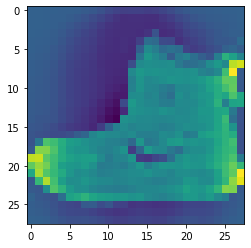

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
print(f"The shape of a train sample is {X_train[0].shape} thus the size is 28*28")
image = X_train[0].reshape(28,28)
plt.imshow(image)

In [ ]:
X_train.shape

(60000, 784)

Building Scaler and PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(.99)
scaler = StandardScaler()
#Normalize data
X_train = scaler.fit_transform(X_train)
#apply PCA
X_train_pca = pca.fit_transform(X_train)

Visualize the image obtained keeping the components chosen by the PCA

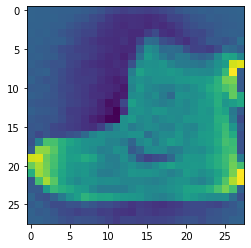

In [ ]:
#From the image sample after pca (only 6 components) go back to a full 28*28 image (lost information in the process)
inverse_pca_image = pca.inverse_transform(X_train_pca[0])

#Apply the reverse of the normalization done to data (Expected a sample with 28*28 columns)
inverse_normalization_image = scaler.inverse_transform( inverse_pca_image.reshape(1,-1) )

#reshape image to be able to plot it
result_image = inverse_normalization_image.reshape(28 , 28)
plt.imshow( result_image )

Applying Manually the PCA

1. Compute the covariance matrix. This shows how the features (in this case each pixel) is correlated to any other. Thus the covarince matrix has a shpe of ( n_features , n_features )
2. Compute EigenValues and EigenVectors of the covaraince matrix



In [ ]:
#compute covariance of the dataset (rapresented as each record a flatten image)
covariance_matrix = np.cov( X_train.transpose() )

#compute eigenvalues and eigenvectors of that covariance matrix
EigVal,EigVec = np.linalg.eig(covariance_matrix)

In [ ]:
print(f"The Covariance matrix has shape {covariance_matrix.shape}\nThe Eigen Values array has shape {EigVal.shape}\nThe Eigen Vectors matrix has shape {EigVec.shape}")

The Covariance matrix has shape (784, 784)
The Eigen Values array has shape (784,)
The Eigen Vectors matrix has shape (784, 784)


Eigenvalues are quite different. These values give us the order of significance of eigenvectors or directions. The axis along eigenvector with the largest eigenvalue is the most significant PC axis and so on.

In [ ]:
EigVal[:10]

array([173.13789644, 113.01260323,  42.81633652,  39.89596074,
        31.79084015,  23.67336435,  21.54106703,  18.13934684,
        13.27049633,  10.33363286])

In [ ]:
order = EigVal.argsort()[::-1]
#reorder according to descendent EigenValOrder
EigVal = EigVal[order]
#reorder the components of each Eigenvector according to its eigenvalue
EigVec = EigVec[:,order]

The Principal Components are computed by the cross prodoct between the dataset and the ordered Eigen Vectors

In [ ]:
n_components = 6
PC = np.matmul( X_train , EigVec[ : , :n_components] )

By keeping only a subset of each EigenVector components (the first n_components) we reduce the features of each data to only the top n, according to decreasing eigenvalue. Thus reducing the features to the top n that summurize better the variance

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
PC.shape

(60000, 6)

To reconstruct the image from the PC is performed a cross prodoct between the PC and the Transpose matrix of the Eigen Vectors (with only the n_components wanted). Note that at this point the infromation of the components not present in the PC is already lost

Top 6 PC

In [ ]:
data_original = np.matmul(PC, EigVec[ : , :n_components].T)

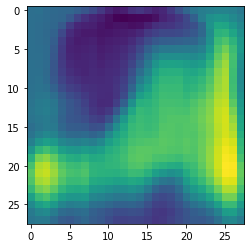

In [ ]:
result_image = data_original[0].reshape( 28 , 28 )
plt.imshow(result_image)

Last 6 PC

In [ ]:
data_original = np.matmul(PC, EigVec[ : ,-n_components:].T)

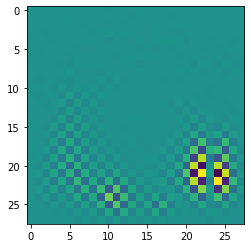

In [ ]:
result_image = data_original[0].reshape( 28 , 28 )
plt.imshow(result_image)